# Assignment III

You can work on this assignment on your own or in pairs. 

I would like you to be a bit creative with this last one, I will give you a suggested list, but feel free to add some extra analysis! Data science is never a rutine or a standard procedure ;)

- Pick a meaningful dataset for you
- **Briefly** summarize what it contains
- Test at least 3 hypothesis. Define them previously, writing down H0 and H1, your significance level and confidence. Would be nice if you use different tests. Extra points if the tests are interesting ;)
- Pick two numerical variables and adjust a linear model between them. Show the plot and describe what can be said about the model ($R^2$, coefficients, significance...). I don't want the variables to be perfectly correlated, I want the explanation to be right and clear. It is fine if the model is a disaster.
- Adjust a new model with at least 2 independent variables. One of them should be categorical and the other one numerical. Give a meaningful interpretation of the model. Does it increase its performance against the simple regression one? How?

Be visual please! Think about this assignment more like a business report rather than a university activity.

Some suggested sources for datasets:

- https://www.kaggle.com/datasets?fileType=csv&sizeEnd=50%2CMB
- https://piktochart.com/blog/100-data-sets/
- https://towardsdatascience.com/all-the-datasets-you-need-to-practice-data-science-skills-and-make-a-great-portfolio-857a348883b5
- https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P4-Demographic-Data.csv

or...

In [1]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

In [2]:
kaggle_path = "letmewin97/coronavirus-tweets"
kaggle_path_Name = "Corona.csv"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfCoronaTweets = pd.read_csv(r'Corona.csv/Corona.csv')

In [4]:
dfCoronaTweets.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive


In [5]:
dfCoronaTweets.shape

(41157, 6)

In [6]:
sns.__version__

'0.9.0'

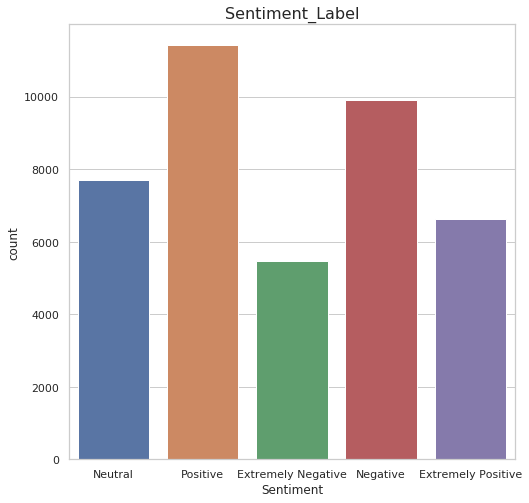

In [7]:
count_categorical(dfCoronaTweets, 'Sentiment', 'Sentiment_Label')

In [8]:
dfCoronaTweets_dummy = pd.get_dummies(dfCoronaTweets['Sentiment'])
dfCoronaTweets_dummy.shape

(41157, 5)

In [9]:
dfCoronaTweets_dummy.head(3)

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1


In [10]:
dfCoronaTweets_concat = pd.concat([dfCoronaTweets, dfCoronaTweets_dummy], axis=1)
dfCoronaTweets_concat.shape

(41157, 11)

In [11]:
dfCoronaTweets_concat['TweetAt']= dfCoronaTweets_concat['TweetAt'].astype('datetime64[ns]')

In [12]:
dfCoronaTweets_concat.dtypes

UserName                       int64
ScreenName                     int64
Location                      object
TweetAt               datetime64[ns]
OriginalTweet                 object
Sentiment                     object
Extremely Negative             uint8
Extremely Positive             uint8
Negative                       uint8
Neutral                        uint8
Positive                       uint8
dtype: object

In [13]:
dfCoronaTweets_concat.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,0,0,1,0
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,0,0,0,0,1
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,0,0,0,0,1


In [14]:
dfCoronaTweets_gr =  dfCoronaTweets_concat.groupby("TweetAt")['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'].sum()
dfCoronaTweets_gr.reset_index(inplace=True)
dfCoronaTweets_gr.shape

(30, 6)

In [15]:
dfCoronaTweets_gr.head(3)

,TweetAt,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,2020-01-04,90.0,89.0,156.0,125.0,170.0
1,2020-02-04,119.0,141.0,242.0,201.0,251.0
2,2020-03-04,103.0,117.0,208.0,154.0,228.0


In [16]:
dfCoronaTweets_gr_melt = pd.melt(dfCoronaTweets_gr,id_vars=['TweetAt'], value_vars=['Extremely Negative', 'Extremely Positive', 'Negative', 'Neutral', 'Positive'],
                           var_name = "evaluation", value_name = "count")
dfCoronaTweets_gr_melt.shape

(150, 3)

In [17]:
dfCoronaTweets_gr_melt.head(3)

,TweetAt,evaluation,count
0,2020-01-04,Extremely Negative,90.0
1,2020-02-04,Extremely Negative,119.0
2,2020-03-04,Extremely Negative,103.0


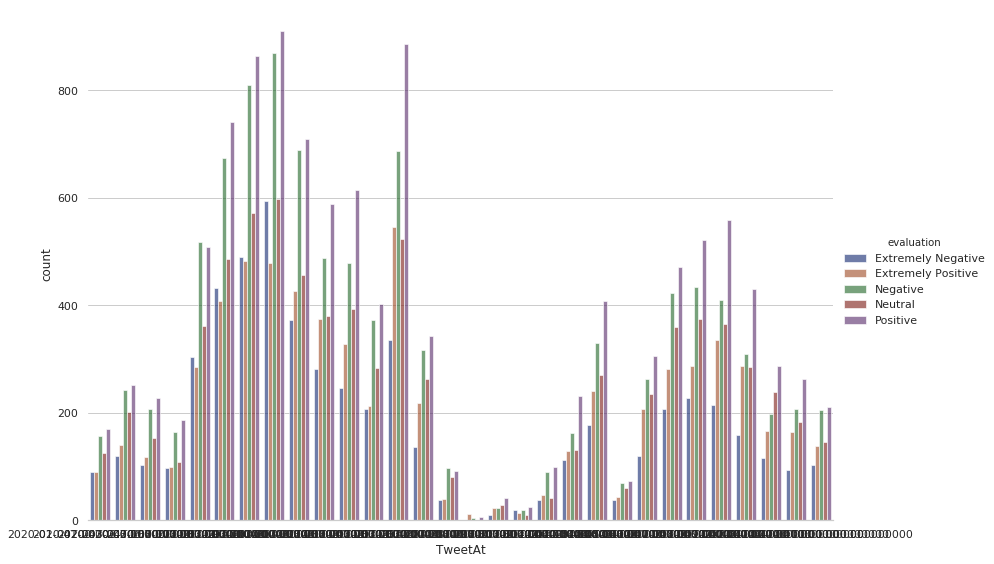

In [19]:
categorical_plot(df=dfCoronaTweets_gr_melt, p_kind="bar", p_x="TweetAt", p_y="count", 
                 p_hue ="evaluation", p_ci="sd", p_palette="dark", p_alpha=.6, p_height=8)

In [21]:
#pd.isnull(dfCoronaTweets_gr_melt)
dfCoronaTweets_gr_melt.isnull().values.any()

False

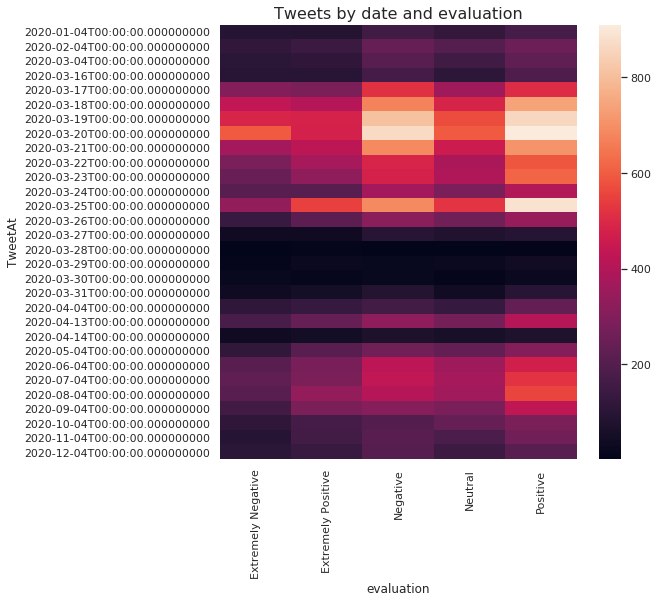

In [36]:
#dfCoronaTweets_gr_melt_pivot = dfCoronaTweets_gr_melt.pivot('TweetAt','evaluation','count')
#ax = sns.heatmap(dfCoronaTweets_gr_melt_pivot)
pivot_heatmap(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")

In [44]:
%run Assignment_III_Helper.ipynb
%run Assignment_III_Plot.ipynb

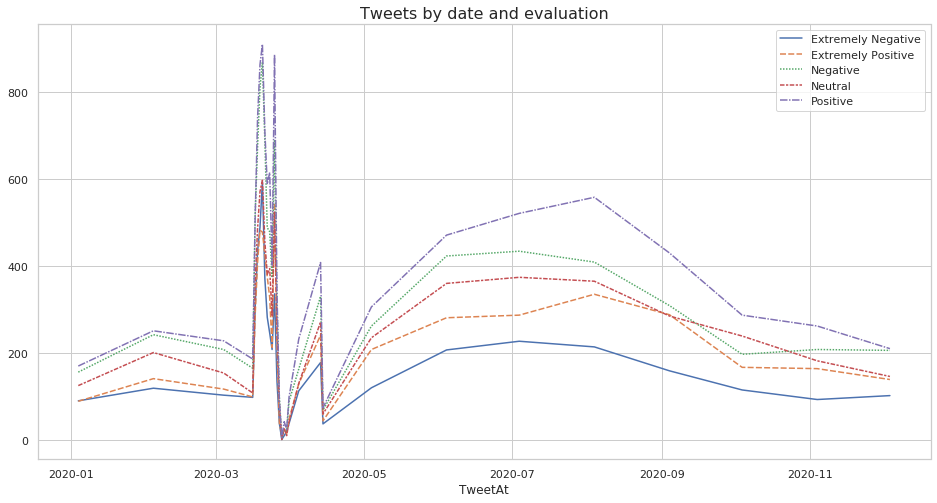

In [45]:
pivot_lineplot(dfCoronaTweets_gr_melt_pivot, "Tweets by date and evaluation")